# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças Cardiovasculares geralmente são eventos agudos causados principalmente por um bloqueio que impede que o sangue flua para o coração ou para o cérebro.

A razão mais comum para isso é o acúmulo de depósitos de gordura nas paredes internas dos vasos sanguíneos que irrigam o coração ou o cérebro. Os acidentes vasculares cerebrais também podem ser causados por uma hemorragia em vasos sanguíneos do cérebro ou a partir de coágulos de sangue. 

A causa de ataques cardíacos e AVCs geralmente são uma combinação de fatores de risco, como o uso de tabaco, dietas inadequadas e obesidade, sedentarismo e o uso nocivo do álcool, hipertensão, diabetes e hiperlipidemia.

<center><img src="https://github.com/mazzidougs/HeartDisease/blob/main/jesse-orrico-Us3AQvyOP-o-unsplash%20(1).jpg?raw=true"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no estilo de vida.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Podemos ressaltar que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 1025 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

* O arquivo `csv` com os dados de 1025 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_1025).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/heart-diseases.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_amount).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depressão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - Teste de estresse cardíaco
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (1025 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_1025"
dataset_brasil = "https://raw.githubusercontent.com/mazzidougs/HeartDisease/main/dataset_amount"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

# Análise exploratória

Esta é uma etapa muito importante de nosso processo para nos situarmos em relação ao dataset que iremos trabalhar, aqui veremos o tamanho de nosso df, uma descrição estatística, tipos de nossas variáveis, verificaremos quantas pessoas possuem doença ou não dado o df, contaremos os valores ausentes e plotaremos alguns gráficos.
  

Verificando o tamanho de nosso dataframe:


In [ ]:
print("Forma dos dados")
print("Linhas:\t\t",df.shape[0])
print("Colunas:\t",df.shape[1])

Forma dos dados
Linhas:		 1025
Colunas:	 14


Descrição estatística:

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Tipos dos atributos:

In [ ]:
#Para vermos os tipos de nossas variáveis, utilizamos o dtypes

df.dtypes

#podemos verificar que a maioria são do tipo float e apenas a váriavel num é do tipo inteiro
#depois de mostrarmos nosso df, vemos que a váriavel "num" é binária, portanto assume o valor de 0 ou 1

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Verificando as 5 primeiras entradas com head. Se colocarmos um parâmetro dentro dos parênteses, escolhemos a quantidade de itens a ser mostrados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#A nossa variável num diz respeito a quais pessoas possuem doença cardíaca ou não, podemos contar esses valores com value_counts

df.target.value_counts()

#após executarmos, observamos que 499 pessoas não possuem doenças cardíacas e 526 pessoas possuem

1    526
0    499
Name: target, dtype: int64

Agora faremos uma etapa muito importante para a análise de nossos dados, verificaremos quais valores de nosso df são ausentes, para isso, usaremos o isnull.

In [ ]:
df.isnull().sum()

#adicionei o sum para a visualização dos valores ausentes ficar mais simples
#depois de rodarmos a célula, podemos verificar que não possuimos valores ausentes em nosso df, o que é muito bom!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Verificando a existência de outliers

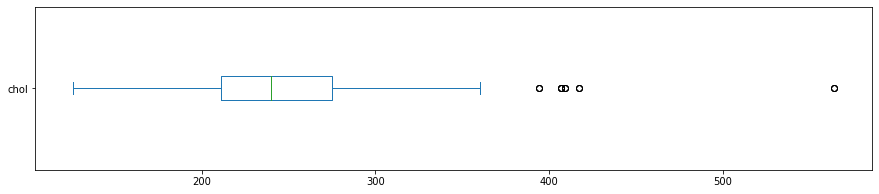

In [ ]:
#Verificando outliers

df.chol.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

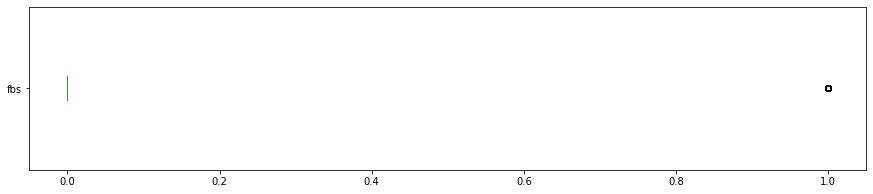

In [ ]:
df.fbs.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

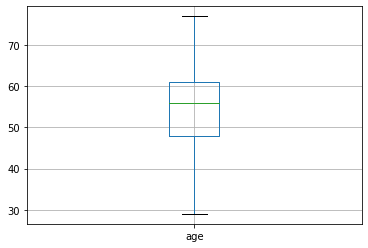

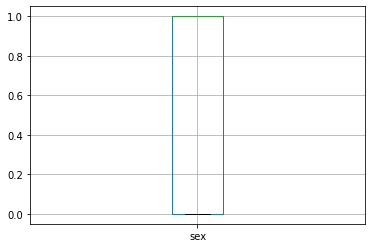

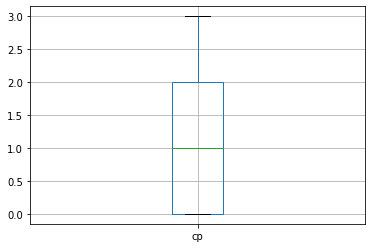

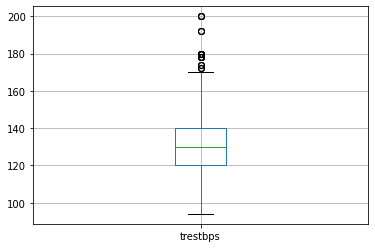

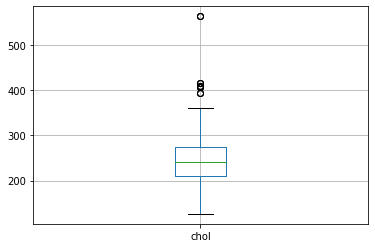

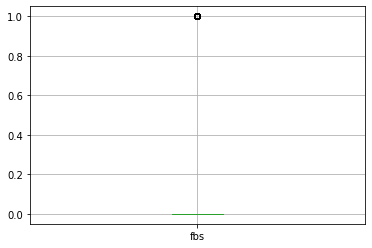

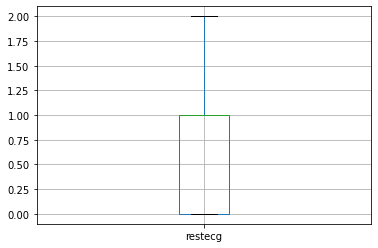

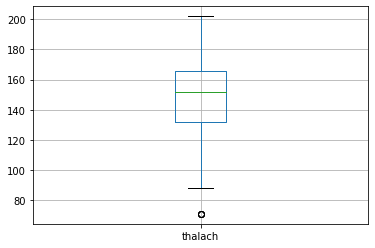

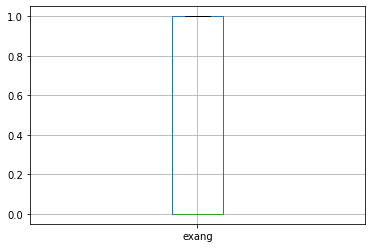

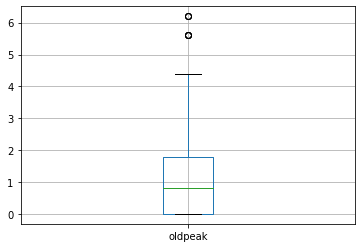

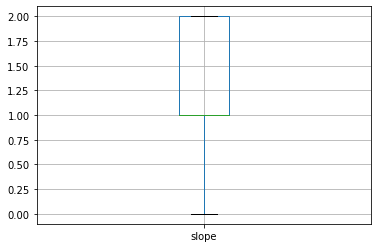

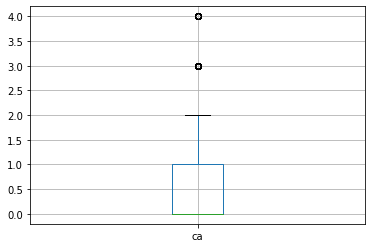

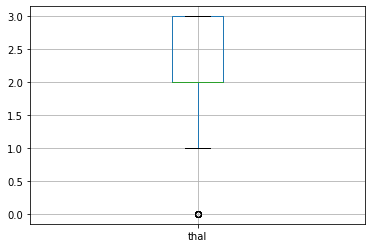

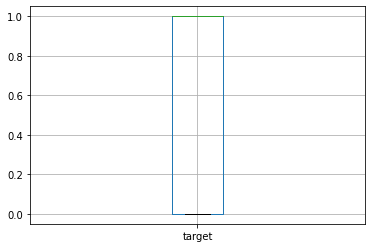

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [ ]:
#eliminando outliers

#chol
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.chol > 380].index, axis=0, inplace=True)

#trestbps
#df_clean.drop(df_clean[df_clean.trestbps > 170].index, axis=0, inplace=True)

#thalach
df_clean.drop(df_clean[df_clean.thalach < 80].index, axis=0, inplace=True)

#oldpeak
df_clean.drop(df_clean[df_clean.oldpeak > 5].index, axis=0, inplace=True)

#ca
df_clean.drop(df_clean[df_clean.ca > 2.5].index, axis=0, inplace=True)

#thal
df_clean.drop(df_clean[df_clean.thal < 1].index, axis=0, inplace=True)


In [ ]:
print("Forma dos dados")
print("Linhas:\t\t",df_clean.shape[0])
print("Colunas:\t",df_clean.shape[1])

Forma dos dados
Linhas:		 911
Colunas:	 14


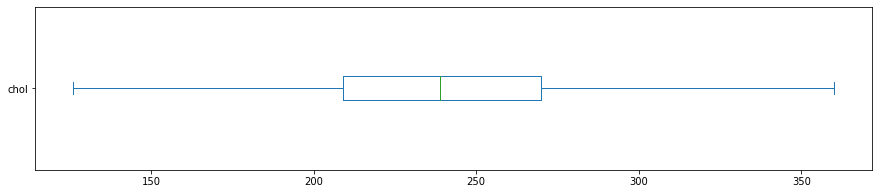

In [ ]:
df_clean.chol.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

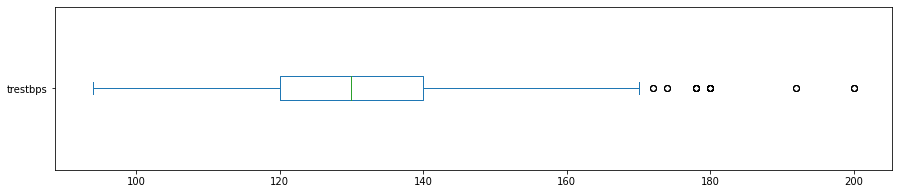

In [ ]:
df_clean.trestbps.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

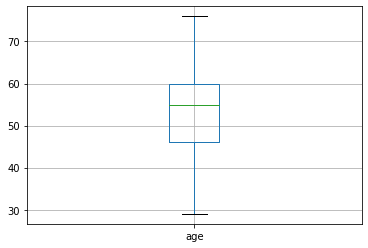

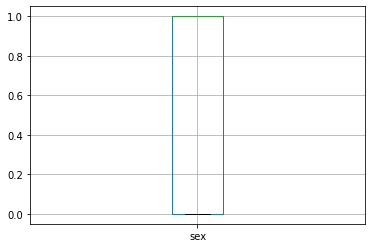

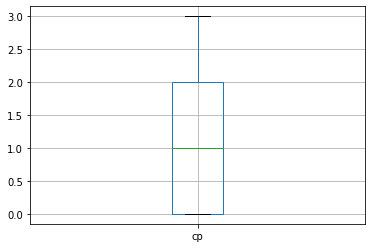

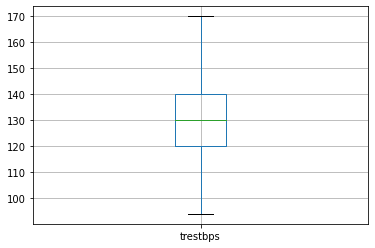

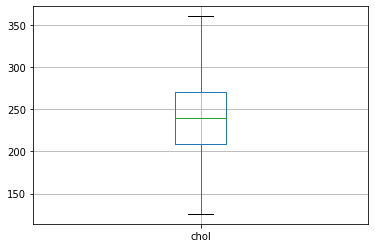

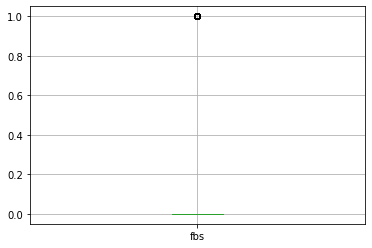

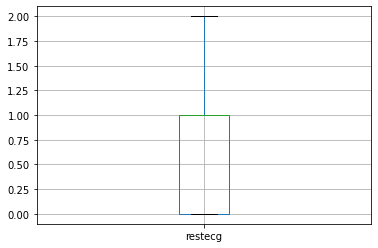

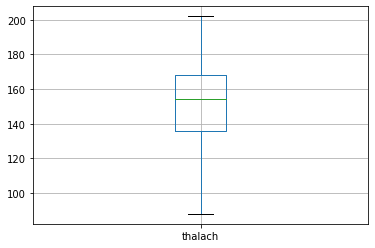

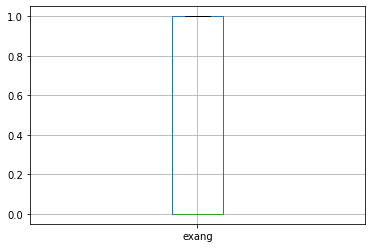

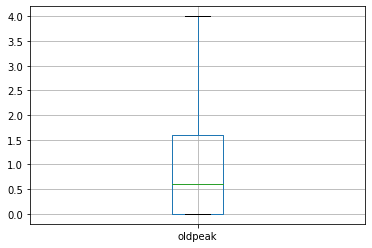

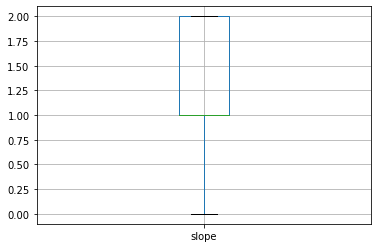

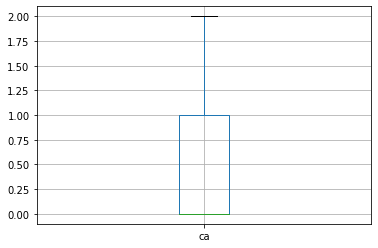

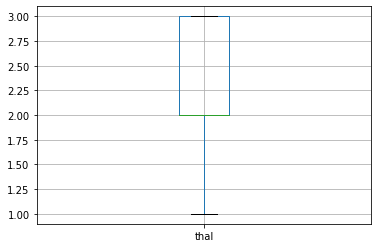

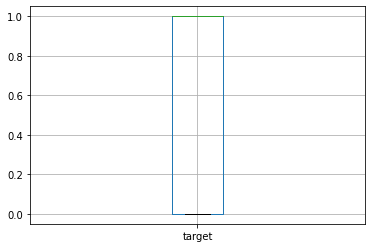

In [ ]:
for column in df_clean:
    plt.figure()
    df_clean.boxplot([column])

In [ ]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,54.043908,0.689352,0.971460,131.189901,243.015368,0.138310,0.536773,150.557629,0.338090,1.008452,1.408342,0.532382,2.323820,0.537870
std,8.985840,0.463013,1.038415,17.874475,44.712830,0.345414,0.522587,22.508038,0.473319,1.087928,0.616706,0.732896,0.586921,0.498838
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,2.000000,3.000000,1.000000


##Verificando o crescimento de mortes por doenças cardíacas no Brasil

Gráfico de linha para df_brasil:

In [ ]:
df_brasil.head(None)

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672
5,2012,333.295
6,2011,335.213
7,2010,326.371
8,2009,320.074
9,2008,317.797


26.053166858092357




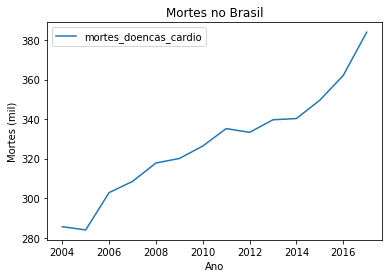

In [ ]:
df_brasil.plot('ano', 'mortes_doencas_cardio', kind='line', xlabel='Ano', title='Mortes no Brasil', ylabel='Mortes (mil)')

max_value = df_brasil.mortes_doencas_cardio.max()
min_value = df_brasil.mortes_doencas_cardio.min()

growth_rate = (max_value - min_value)/(max_value/100)
print(growth_rate)
print('\n')

Após plotarmos o gráfico, notamos uma alta de 100.000 mortes no período de 2004 a 2016 e também uma taxa de crescimento de `26.05%` do ano de 2004 ao ano de 2017. 


Agora começaremos uma análise em relação ao sexo dos pacientes.

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

Gênero dos pacientes:

0 - Mulher;

1 - Homem;

Em relação à gênero, 713 pacientes são homens e 312 são mulheres. Vamos plotar um gráfico para visualizarmos a diferença.



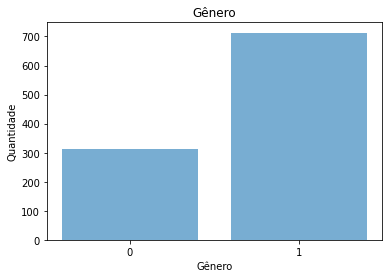

In [ ]:
x = df.sex.value_counts().index #aqui definimos os valores presentes no atríbuto 'sex' como indíce
y = df.sex.value_counts().values #aqui definimos os valores presentes no atríbuto 'sex' com os valores presentes no df.sex

fig, ax = plt.subplots()                       
ax.bar(x, y, align='center', alpha=0.6)         
ax.set_xticks(x)                               
ax.set_xlabel('Gênero')                        
ax.set_ylabel('Quantidade')                    
ax.set_title('Gênero')                         
plt.show()                                     

Vamos ver a quantidade de homens e mulheres que possuem e não possuem doença cardiovascular.



In [ ]:
((df["sex"] == 0) & (df["target"] == 0)).value_counts() 
# 86 pacientes são mulheres e não possuem doença cardíaca

False    939
True      86
dtype: int64

In [ ]:
((df["sex"] == 0) & (df["target"] == 1)).value_counts() 
# 226 pacientes são mulheres e possuem doença cardíaca

False    799
True     226
dtype: int64

In [ ]:
((df["sex"] == 1) & (df["target"] == 0)).value_counts() 
# 413 pacientes são homens e não possuem doença cardíaca

False    612
True     413
dtype: int64

In [ ]:
((df["sex"] == 1) & (df["target"] == 1)).value_counts() 
# 300 pacientes são homens e possuem doença cardíaca

False    725
True     300
dtype: int64

Armazenando a quantidade de homens e mulheres em variáveis para efetuarmos o cálculo de porcentagem. 

In [ ]:
women_amount = (df.sex == 0).sum() #soma de todas as mulheres
women_amount_d = ((df["sex"] == 0) & (df["target"] == 1)).sum() #mulheres e cardiopatia

men_amount = (df.sex == 1).sum() #soma de todos os homens
men_amount_d = ((df["sex"] == 1) & (df["target"] == 1)).sum() #homens e cardiopatia

Aqui é calculada a porcentagem de homens e mulheres com doença cardiovascular.

In [ ]:
perc_women = (100*women_amount_d)/women_amount
print(perc_women)

perc_men = (100*men_amount_d)/men_amount
print(perc_men)

72.43589743589743
42.07573632538569


* Mulheres sem doença cardíaca: `86` 
* Mulheres com doença cardíaca: `226`

* Homens sem doença cardíaca: `413`
* Homens com doença cardíaca: `300`


Após realizarmos essa análise, notamos que `72.44%` das mulheres  e `42.07%` dos homens possuem doença neste dataset. Esta porcentagem é explicada pela maior quantidade de homens.

Aqui vamos visualizar as correlações entre as variáveis e salvar na variável `corr`, seguindo a análise vamos plotar um mapa de calor para visualizarmos de maneira mais intuitiva e teremos uma explicação mais detalhada.

In [ ]:
corr = df_clean.corr(method='pearson')
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089161,-0.033194,0.279837,0.147536,0.144262,-0.104714,-0.375757,0.099596,0.189258,-0.147403,0.374890,0.078146,-0.208018
sex,-0.089161,1.000000,-0.048173,-0.069478,-0.153861,0.021586,-0.109422,-0.043147,0.123751,0.128258,-0.036326,0.066917,0.241174,-0.293950
cp,-0.033194,-0.048173,1.000000,0.066364,-0.044817,0.121311,0.036361,0.283204,-0.396206,-0.131395,0.083425,-0.224037,-0.172337,0.409403
trestbps,0.279837,-0.069478,0.066364,1.000000,0.146998,0.201671,-0.099863,-0.021465,0.052411,0.189780,-0.105435,0.067854,0.049753,-0.122141
chol,0.147536,-0.153861,-0.044817,0.146998,1.000000,-0.005545,-0.101137,-0.017209,0.076291,0.008268,0.027987,0.085563,0.080753,-0.107135
fbs,0.144262,0.021586,0.121311,0.201671,-0.005545,1.000000,-0.101261,-0.007952,0.043022,0.051570,-0.100343,0.147241,-0.036867,-0.036810
restecg,-0.104714,-0.109422,0.036361,-0.099863,-0.101137,-0.101261,1.000000,0.049545,-0.059203,-0.081824,0.123844,-0.101382,0.030998,0.130599
thalach,-0.375757,-0.043147,0.283204,-0.021465,-0.017209,-0.007952,0.049545,1.000000,-0.424537,-0.355082,0.387883,-0.227524,-0.122073,0.392544
exang,0.099596,0.123751,-0.396206,0.052411,0.076291,0.043022,-0.059203,-0.424537,1.000000,0.365129,-0.285247,0.199657,0.234429,-0.440586
oldpeak,0.189258,0.128258,-0.131395,0.189780,0.008268,0.051570,-0.081824,-0.355082,0.365129,1.000000,-0.546958,0.276332,0.192246,-0.430169


####Gráfico de dispersão:

Este é importante para vermos correlações entre as variáveis em uma forma gráfica, temos 3 tipos de correlações: `postiva`, `negativa` e `nula`.

Quando temos a `positiva`, vemos que a variável independente aumenta e a dependente também. A `negativa` se dá pela diminuição da independente e consequentemente da dependente. Já a `nula`, não ocorre nem aumento e nem diminuição, portanto há uma dispersão entre os pontos e isso significa que não há correlação aparente entre as variáveis.

Gráfico de dispersão (idade x colesterol)

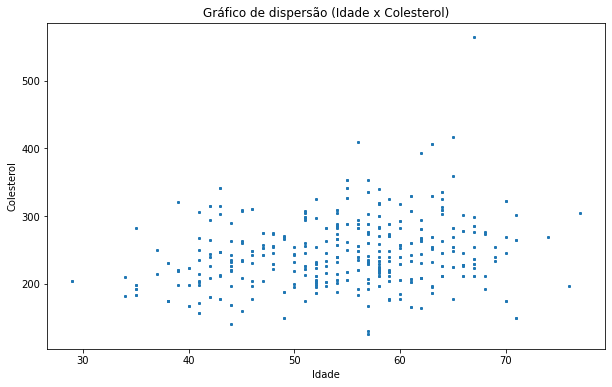

In [ ]:
#grafico de dispersão entre age e chol

fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter('age', 'chol', data=df, s=3, alpha=1)
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol')
ax.set_title('Gráfico de dispersão (Idade x Colesterol)');

Gráfico de dispersão após a remoção de outliers.

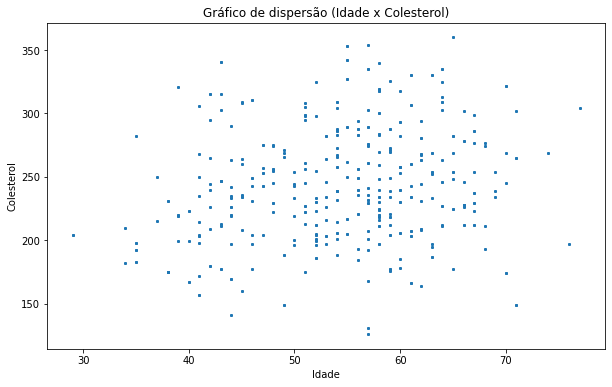

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter('age', 'chol', data=df_clean, s=3, alpha=1)
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol')
ax.set_title('Gráfico de dispersão (Idade x Colesterol)');

Neste plot, vemos uma correlação nula, podemos notar uma concentração de pacientes com nível de colesterol um pouco mais evidenciada entre as idades 50-60, mas isso não significa que os níveis de colesterol nesta idade sejam superiores ou inferiores aos dos demais.

###Histograma de nível de colesterol



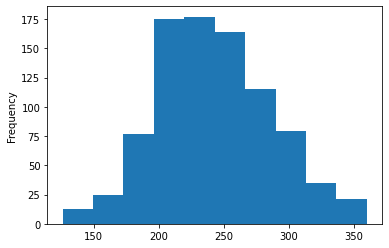

In [ ]:
df_clean.chol.plot(kind='hist');

Ao vermos este gráfico, notamos uma concentração de pacientes contendo níveis entre 200-300 (mg/dL - miligramas por decilitro). Para referência, um nível de colesterol interessante para o ser o humano seria menor que 200 mg/dL.

###Plotando heatmap de correlação:


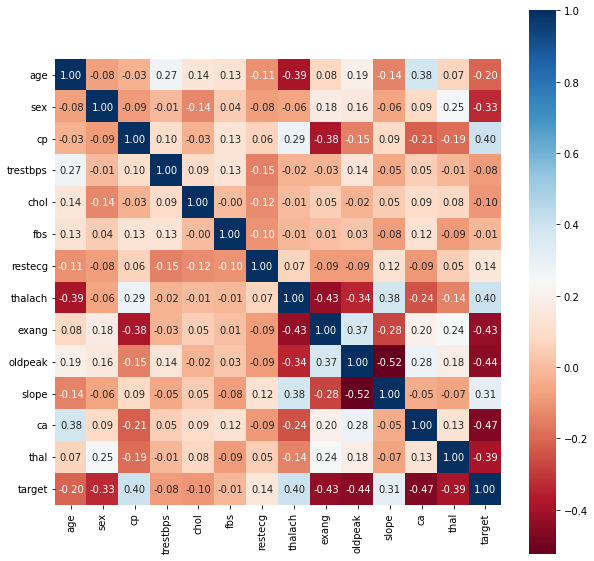

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr, cmap='RdBu', fmt='.2f', 
            square=True, linecolor='white', annot=True, ax=ax);

Após plotarmos o `heatmap`, não vemos uma correlação significativa.

`thal:` teste de estresse cardíaco;

`num:` pessoas que possuem ou não doença cardiovascular;

`oldpeak:` depressão do segmento ST induzida pelo exercício em relação ao repouso;

`thalach:` máximo batimento cardíaco atingido.


Em `thal` e `num`, vemos um coeficiente de correlação `r = 0.52`, onde este valor é moderado, portanto não se afetam significativamente.

Em `oldpeak` e `num` o coeficiente de correlação `r = 0.58`, no qual este valor é um pouco maior que o anterior, mas ainda moderado.

É interessante notar que o atributo `thalach`, possui uma correlação negativa moderada em relação ao atributo `num`, em que `r = -0,42`. 

# Implementação do modelo

Neste passo, iniciaremos a construir um modelo para classificarmos se um paciente possui doença cardíaca ou não.

## Logistic Regression

In [ ]:
# importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
# instanciando e e escolhendo os hyperparameters
lr_model = LogisticRegression()

# criando x e y
x = df_clean.drop('target', axis=1)
y = df_clean.target

# dividindo o dataset entre treino e teste
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=test_size,
                                                        random_state=seed)

# padronizando os dados de treino
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# padronizando os dados de teste
x_test = scaler.transform(x_test)

# fit do modelo
lr_model.fit(x_train, y_train)

# previsões
y_pred = lr_model.predict(x_test)

# acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       146
           1       0.83      0.92      0.87       155

    accuracy                           0.86       301
   macro avg       0.86      0.86      0.86       301
weighted avg       0.86      0.86      0.86       301



In [ ]:
print('R2 Score:\t', r2_score(y_test, y_pred))
print('MAE:\t\t', mean_absolute_error(y_test, y_pred))
print('MSE:\t\t', mean_squared_error(y_test, y_pred))

R2 Score:	 0.42806009721608496
MAE:		 0.14285714285714285
MSE:		 0.14285714285714285


Text(51.0, 0.5, 'Prediction')

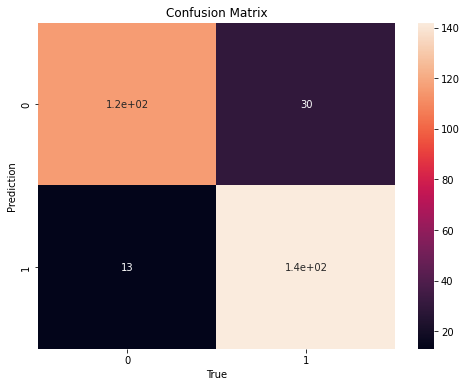

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

Após a implementação do modelo de regressão logística, não observamos uma performance significativa, nossa variável target é pouco explicada a partir de nossos atributos preditivos.

##Decision Tree

In [ ]:
from sklearn import tree

# instanciando e e escolhendo os hyperparameters
dt_model = tree.DecisionTreeClassifier()

# criando x e y
x2 = df_clean.drop('target', axis=1)
y2 = df_clean.target

# dividindo o dataset entre treino e teste
seed = 7
test_size = 0.33
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, 
                                                        test_size=test_size,
                                                        random_state=seed)

# padronizando os dados de treino
scaler = StandardScaler().fit(x_train2)
x_train2 = scaler.transform(x_train2)

# padronizando os dados de teste
x_test2 = scaler.transform(x_test2)

# fit do modelo
dt_model.fit(x_train2, y_train2)

# previsões
y_pred2 = dt_model.predict(x_test2)

# acurácia
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 99.00%


In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       146
           1       0.98      1.00      0.99       155

    accuracy                           0.99       301
   macro avg       0.99      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301



In [ ]:
print('R2 Score:\t', r2_score(y_test2, y_pred2))
print('MAE:\t\t', mean_absolute_error(y_test2, y_pred2))
print('MSE:\t\t', mean_squared_error(y_test2, y_pred2))

R2 Score:	 0.9600972160848431
MAE:		 0.009966777408637873
MSE:		 0.009966777408637873


Text(51.0, 0.5, 'Prediction')

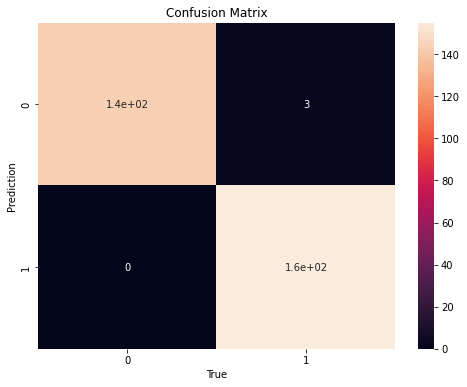

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

Neste ponto implementamos um modelo de árvore de decisão a fim de conseguir melhores resultados para nossas avaliações.

De primeiro momento, podemos observar que as métricas possuem números ótimos e nem sempre isso é bom, dado que elas podem estar enviesadas a receber um valor que não é real para o problema que estamos trabalhando.

## XGBoost

In [ ]:
#importar as bibliotecas para o xgboost
from xgboost import XGBClassifier

# criando x e y
x3 = df_clean.drop('target', axis=1)
y3 = df_clean.target

# dividindo o dataset entre treino e teste
seed = 7
test_size = 0.33
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, 
                                                        test_size=test_size,
                                                        random_state=seed)

# padronizando os dados de treino
scaler = StandardScaler().fit(x_train3)
x_train3 = scaler.transform(x_train3)

# padronizando os dados de teste
x_test3 = scaler.transform(x_test3)

# fit do modelo
model = XGBClassifier()
model.fit(x_train3, y_train3)

# predições
y_pred3 = model.predict(x_test3)
predictions = [round(value) for value in y_pred]

# acurácia
accuracy3 = accuracy_score(y_test3, predictions)
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))

Accuracy: 85.71%


In [ ]:
print(classification_report(y_test3, predictions))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       146
           1       0.83      0.92      0.87       155

    accuracy                           0.86       301
   macro avg       0.86      0.86      0.86       301
weighted avg       0.86      0.86      0.86       301



In [ ]:
print('R2 Score:\t', r2_score(y_test3, y_pred3))
print('MAE:\t\t', mean_absolute_error(y_test3, y_pred3))
print('MSE:\t\t', mean_squared_error(y_test3, y_pred3))

R2 Score:	 0.8802916482545294
MAE:		 0.029900332225913623
MSE:		 0.029900332225913623


Text(51.0, 0.5, 'Prediction')

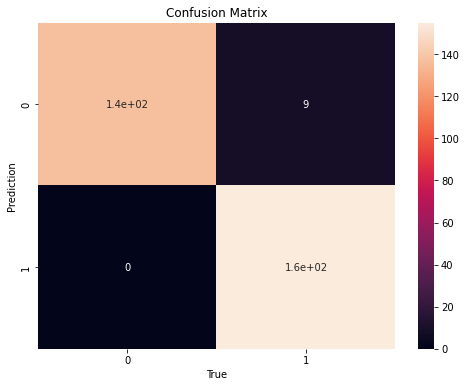

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test3, y_pred3), annot=True, ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

Com a implementação do modelo XGBoost, vemos uma boa performace e resultados mais reais para as métricas.

Podemos concluir esta etapa dizendo que este foi o melhor modelo para utilização neste problema.

## Conclusão:

Após esta análise, pudemos verificar a existência de valores ausentes, outliers e problemas comuns de serem encontrados em bases de dados. Foi limpo, analisado e implementado com um modelo com uma boa confiabilidade segundo as métricas estatísticas.

Buscamos validar alguma correlação importante em relação à possuir ou não uma doença cardíaca, porém, obtemos apenas correlações moderadas e não significativas.

Uma questão importante, também dita no inicio, seria adotar algumas medidas e mudanças no estilo de vida, pois é estimado que 90% das doenças cardiovasculares poderiam ser evitadas por isso.